# Driver Drowsiness detection using CNN 

# Modules

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 4.1 MB/s 


In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=39100e425c5a73676f5f279370063dd454d007fd24eff99c77fa291b49955e46
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
pip install pygobject

In [ ]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=57db7f14ae01c2eae715c60905fecfe1cda0b88cf8bdc9a6af86705b2fb7680b
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageDraw
from playsound import playsound
import matplotlib.pyplot as plt
from tensorflow import keras
import face_recognition
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import cv2
import os

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


# PARAMETERS

In [ ]:
batch_size_val = 80  # how many to process together
epochs_val = 100
noOfClasses=2
imageDimesions = (80, 80,3) 
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation

# EYE Cropping from full face images

# FOR OPEN EYES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Image stored directory(where both the full and cropped images(folders) are present):-
image_stored_directory=r'/content/drive/MyDrive/ML_final/IMAGE'     

# Full sized image directory:-
im_dir=r'/content/drive/MyDrive/ML_final/IMAGE/F_OPENED'    

# Folder to save cropped images
save_img_dir=r'/content/drive/MyDrive/ML_final/IMAGE/CROPPED/OPEN' 
    

os.chdir(image_stored_directory)
paths = [] # all images
count=0
for r, d, f in os.walk(im_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    # Using Facial Recognition Library on Image
    image = face_recognition.load_image_file(path)
    # create a variable for the facial feature coordinates
    face_landmarks_list = face_recognition.face_landmarks(image)

    # create a placeholder list for the eye coordinates
    eyes = []
    try:
        eyes.append(face_landmarks_list[0]['left_eye'])
        eyes.append(face_landmarks_list[0]['right_eye'])
    except:
        continue
    # establish the max x and y coordinates of the eye
    for eye in eyes:
        x_max = max([coordinate[0] for coordinate in eye])
        x_min = min([coordinate[0] for coordinate in eye])
        y_max = max([coordinate[1] for coordinate in eye])
        y_min = min([coordinate[1] for coordinate in eye])
      # establish the range of x and y coordinates    
        x_range = x_max - x_min
        y_range = y_max - y_min

        # to make sure the full eye is captured,
        # calculate the coordinates of a square that has 50%
        # cushion added to the axis with a larger range
        if x_range > y_range:
            right = round(.5*x_range) + x_max
            left = x_min - round(.5*x_range)
            bottom = round(((right-left) - y_range))/2 + y_max
            top = y_min - round(((right-left) - y_range))/2
        else:
            bottom = round(.5*y_range) + y_max
            top = y_min - round(.5*y_range)
            right = round(((bottom-top) - x_range))/2 + x_max
            left = x_min - round(((bottom-top) - x_range))/2

        #crop original image using the cushioned coordinates
        im = Image.open(path)
        im = im.crop((left, top, right, bottom))

        # resize image for input into our model
        im = im.resize((80,80))

        os.chdir(save_img_dir)
        # save file to output folder
        im.save(str(count)+'.jpg')

        # increase count for iterative file saving
        count += 1
        # print count every 200 photos to monitor progress
        if count % 200 == 0:
            print("Successfully saved "+ str(count)+" images") 
open_img = save_img_dir
print("Total number of cropped images:",(count))


Successfully saved 200 images
Successfully saved 400 images
Successfully saved 600 images
Successfully saved 800 images
Successfully saved 1000 images
Successfully saved 1200 images
Successfully saved 1400 images
Successfully saved 1600 images
Successfully saved 1800 images
Successfully saved 2000 images
Successfully saved 2200 images
Total number of cropped images: 2380


# FOR CLOSED EYES

In [ ]:
# Image stored directory(where both the full and cropped images are present):-
image_stored_directory = r'/content/drive/MyDrive/ML_final/IMAGE'    

# Full sized image directory:-
im_dir = r'/content/drive/MyDrive/ML_final/IMAGE/F_CLOSED' 

# Folder to save cropped images:-
save_img_dir = r'/content/drive/MyDrive/ML_final/IMAGE/CROPPED/CLOSE'

os.chdir(image_stored_directory)
paths = [] # all images
count=0
for r, d, f in os.walk(im_dir):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
      
    image = face_recognition.load_image_file(path)
    # create a variable for the facial feature coordinates
    face_landmarks_list = face_recognition.face_landmarks(image)

    # create a placeholder list for the eye coordinates
    eyes = []
    try:
        eyes.append(face_landmarks_list[0]['left_eye'])
        eyes.append(face_landmarks_list[0]['right_eye'])
    except:
        continue
    # establish the max x and y coordinates of the eye
    for eye in eyes:
        x_max = max([coordinate[0] for coordinate in eye])
        x_min = min([coordinate[0] for coordinate in eye])
        y_max = max([coordinate[1] for coordinate in eye])
        y_min = min([coordinate[1] for coordinate in eye])
      # establish the range of x and y coordinates    
        x_range = x_max - x_min
        y_range = y_max - y_min

        # to make sure the full eye is captured,
        # calculate the coordinates of a square that has 50%
        # cushion added to the axis with a larger range
        if x_range > y_range:
            right = round(.5*x_range) + x_max
            left = x_min - round(.5*x_range)
            bottom = round(((right-left) - y_range))/2 + y_max
            top = y_min - round(((right-left) - y_range))/2
        else:
            bottom = round(.5*y_range) + y_max
            top = y_min - round(.5*y_range)
            right = round(((bottom-top) - x_range))/2 + x_max
            left = x_min - round(((bottom-top) - x_range))/2

        #crop original image using the cushioned coordinates
        im = Image.open(path)
        im = im.crop((left, top, right, bottom))

        # resize image for input into our model
        im = im.resize((80,80))
        os.chdir(save_img_dir)
        # save file to output folder
        im.save(str(count)+'.jpg')

        # increase count for iterative file saving
        count += 1
        # print count every 200 photos to monitor progress
        if (count) % 200 == 0:
            print("successfully saved "+ str(count)+" images")
            
print("Total number of cropped images:",(count))    
close_img = save_img_dir

successfully saved 200 images
successfully saved 400 images
successfully saved 600 images
successfully saved 800 images
successfully saved 1000 images
successfully saved 1200 images
successfully saved 1400 images
successfully saved 1600 images
successfully saved 1800 images
successfully saved 2000 images
Total number of cropped images: 2002


# LOADING CROPPED IMAGES

In [ ]:
# FUNCTION FOR LOADING IMAGES
def load_images_from_folder(folder, eyes = 0):
    count = 0
    error_count = 0
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(img, (80,80)) ## Resizing the images
            ## for eyes if it is 0: open, 1: close
            images.append([img, eyes])
        except:
            error_count += 1
            print('ErrorCount = ' + str(error_count))
            continue
        
        count += 1
        if count % 1000 == 0:
            print('Succesful Image Import Count = ' + str(count))

    return images



# Open eyes 

In [ ]:
open_img = r'/content/drive/MyDrive/ML_final/IMAGE/CROPPED/OPEN' # Location of directory images already cropped

folder = open_img

open_eyes = load_images_from_folder(folder, 0)

Succesful Image Import Count = 1000
Succesful Image Import Count = 2000


# Close eyes

In [ ]:
close_img = r'/content/drive/MyDrive/ML_final/IMAGE/CROPPED/CLOSE' # Location of directory images already cropped
folder = close_img
closed_eyes = load_images_from_folder(folder, 1)


Succesful Image Import Count = 1000
Succesful Image Import Count = 2000


In [ ]:
eyes = closed_eyes + open_eyes

In [ ]:
X = [] # IMAGES
y = [] # LABELS
for features, label in eyes: 
     X.append(features)
     y.append(label)
    
# NUMPY ARRAY CONVERTION
images=np.array(X)    
labels=np.array(y)

print("Total Images",len(X))    

Total Images 4382


In [ ]:
print("Total labels",len(y)) 

Total labels 4382


# DATA SPLITTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images,labels, test_size=testRatio)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [ ]:
# TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET

print("Data Shapes")
print("Train", end="")
print(X_train.shape, y_train.shape)
print("Validation", end="")
print(X_validation.shape, y_validation.shape)
print("Test", end="")
print(X_test.shape, y_test.shape)
assert (X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert (X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"


Data Shapes
Train(2804, 80, 80, 3) (2804,)
Validation(701, 80, 80, 3) (701,)
Test(877, 80, 80, 3) (877,)


# DATA AUGMENTATION 

In [ ]:
print("X_train shape before gray",X_train.shape)

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


X_train = np.array(list(map(preprocessing, X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
print("X_train shape after gray",X_train.shape)


# ADDING A DEPTH OF 1 (grayscale)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print("X_train shape after depth",X_train.shape)


# AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES

dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)


#One hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

X_train shape before gray (2804, 80, 80, 3)
X_train shape after gray (2804, 80, 80)
X_train shape after depth (2804, 80, 80, 1)


# MODEL

In [ ]:
def my_Model():   
    
    # Instantiate the model
    model = Sequential()

    # Adding first three convolutional layers
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu',
                    input_shape = (imageDimesions[0],imageDimesions[1],1) # shape of input (image)
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    
    # Adding pooling after convolutional layers
    model.add(MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

    # Adding second set of convolutional layers
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    model.add(Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function 
                    ))
    
    # Add last pooling layer.
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    # Adding first dense layer with 256 nodes
    model.add(Dense(256, activation='relu'))

    # Adding a dropout layer to avoid overfitting
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3)) 

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # adding output layer
    model.add(Dense(2, activation = 'sigmoid'))

    # compiling the model
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

# TRAINING

In [ ]:
model = my_Model()
print(model.summary())
# FITTING
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val),steps_per_epoch= len(X_train)//batch_size_val, epochs=epochs_val,validation_data=(X_validation, y_validation), shuffle=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 78, 78, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 76, 76, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 33, 33, 32)        9248      
                                                      

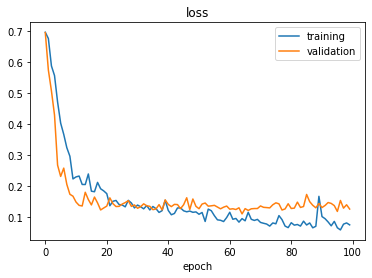

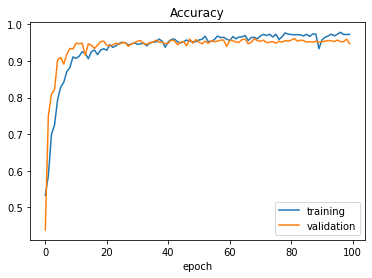

In [ ]:
# PLOT
plt.figure(0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')


plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [ ]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

28/28 [==============================] - 1s 26ms/step - loss: 0.1169 - accuracy: 0.9532
loss: 0.11690045893192291
accuracy: 0.9532496929168701


# SAVING MODEL

In [ ]:
# Directory to save
os.chdir('/content/drive/MyDrive/ML_final')

In [ ]:
model.save("drowiness_new7.h5")

In [ ]:
model.save("drowiness_new7.model")

INFO:tensorflow:Assets written to: drowiness_new7.model/assets
